CISCO HACKATHON

Cleaning dataset

In [268]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score

In [269]:
# exporting data
data = pd.read_csv('data.csv')
data.rename(columns={'FY23Q4 Demand':'FY23 Q4'},inplace=True)


In [270]:
data.head()

,Cost Rank,Product Name,Product Life Cycle,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3,FY23 Q4,FYQ23 Q4 Marketing,FY23 Q4 Stats/ML
0,1,ROUTER 1,Sustaining,NaN,NaN,NaN,906.0,941.0,663.0,769.0,3565.0,1020,1670,38,2141,1716,"1,716","1,948"
1,2,TRANSCIEVER,Sustaining,87173.0,102849.0,126375.0,128629.0,179125.0,138750.0,208760.0,116126.0,150803,82163,82408,67132,85000,"141,285","97,995"
2,3,SWITCH 1,Sustaining,NaN,NaN,NaN,3651.0,10409.0,10575.0,17934.0,15104.0,15525,6938,9595,9231,12000,"11,820","11,184"
3,4,ACCESS POINT 1,Sustaining,NaN,NaN,NaN,NaN,NaN,NaN,9576.0,46029.0,109452,54955,60478,62708,62771,"79,113","65,310"
4,5,ACCESS POINT 2,Sustaining,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26769,33670,74853,80944,76192,"113,704","93,200"


In [271]:
#removing unnecessary columns
data = data.drop(['Cost Rank','Product Life Cycle','FYQ23 Q4 Marketing','FY23 Q4 Stats/ML'], axis = 1)
data.set_index('Product Name', inplace = True)
data.head()

,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3,FY23 Q4
Product Name,,,,,,,,,,,,,
ROUTER 1,NaN,NaN,NaN,906.0,941.0,663.0,769.0,3565.0,1020,1670,38,2141,1716
TRANSCIEVER,87173.0,102849.0,126375.0,128629.0,179125.0,138750.0,208760.0,116126.0,150803,82163,82408,67132,85000
SWITCH 1,NaN,NaN,NaN,3651.0,10409.0,10575.0,17934.0,15104.0,15525,6938,9595,9231,12000
ACCESS POINT 1,NaN,NaN,NaN,NaN,NaN,NaN,9576.0,46029.0,109452,54955,60478,62708,62771
ACCESS POINT 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26769,33670,74853,80944,76192


In [272]:
transposed = data.transpose()
transposed

Product Name,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,SWITCH 5,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
FY20 Q4,NaN,87173.0,NaN,NaN,NaN,13432.0,28585.0,115709.0,NaN,4571.0,NaN,65048.0,NaN,6073.0,1208.0,4.0,6187.0,NaN,NaN,28279.0
FY21 Q1,NaN,102849.0,NaN,NaN,NaN,12463.0,19686.0,98337.0,NaN,4100.0,NaN,67810.0,NaN,5459.0,963.0,-4.0,5301.0,NaN,NaN,22704.0
FY21 Q2,NaN,126375.0,NaN,NaN,NaN,13452.0,44724.0,147681.0,NaN,4830.0,NaN,90928.0,NaN,6736.0,1698.0,36.0,7172.0,NaN,NaN,24098.0
FY21 Q3,906.0,128629.0,3651.0,NaN,NaN,14581.0,37781.0,185327.0,177.0,5472.0,NaN,148547.0,NaN,12213.0,1833.0,305.0,7582.0,NaN,NaN,31461.0
FY21 Q4,941.0,179125.0,10409.0,NaN,NaN,15831.0,31905.0,194170.0,270.0,7391.0,NaN,228945.0,NaN,13883.0,2423.0,1093.0,10964.0,NaN,NaN,47009.0
FY22 Q1,663.0,138750.0,10575.0,NaN,NaN,13864.0,37888.0,220386.0,850.0,7894.0,NaN,204184.0,NaN,27045.0,2602.0,2360.0,11501.0,NaN,NaN,35145.0
FY22 Q2,769.0,208760.0,17934.0,9576.0,NaN,15012.0,32689.0,204604.0,2717.0,7101.0,222.0,245453.0,15.0,15162.0,2341.0,4317.0,14980.0,NaN,NaN,45978.0
FY22 Q3,3565.0,116126.0,15104.0,46029.0,NaN,11349.0,30442.0,194538.0,3833.0,6943.0,1549.0,245803.0,108.0,13855.0,1830.0,4343.0,9158.0,NaN,NaN,34518.0
FY22 Q4,1020.0,150803.0,15525.0,109452.0,26769.0,10422.0,27028.0,185160.0,4279.0,6126.0,4619.0,136283.0,1972.0,12351.0,1567.0,4094.0,11601.0,13260.0,1227.0,40605.0
FY23 Q1,1670.0,82163.0,6938.0,54955.0,33670.0,8726.0,21246.0,147284.0,6089.0,4616.0,4764.0,76020.0,2427.0,8933.0,1210.0,2756.0,3788.0,21667.0,24186.0,26925.0


In [273]:
transposed.index

Index(['FY20 Q4', 'FY21 Q1', 'FY21 Q2', 'FY21 Q3', 'FY21 Q4', 'FY22 Q1',
       'FY22 Q2', 'FY22 Q3', 'FY22 Q4', 'FY23 Q1', 'FY23 Q2', 'FY23 Q3',
       'FY23 Q4'],
      dtype='object')

In [274]:
transposed = transposed.reset_index().rename(columns={'index': 'Quarters'})


In [275]:
transposed.index

RangeIndex(start=0, stop=13, step=1)

In [276]:
transposed.columns

Index(['Quarters', 'ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2'],
      dtype='object', name='Product Name')

In [277]:
transposed

Product Name,Quarters,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
0,FY20 Q4,NaN,87173.0,NaN,NaN,NaN,13432.0,28585.0,115709.0,NaN,...,NaN,65048.0,NaN,6073.0,1208.0,4.0,6187.0,NaN,NaN,28279.0
1,FY21 Q1,NaN,102849.0,NaN,NaN,NaN,12463.0,19686.0,98337.0,NaN,...,NaN,67810.0,NaN,5459.0,963.0,-4.0,5301.0,NaN,NaN,22704.0
2,FY21 Q2,NaN,126375.0,NaN,NaN,NaN,13452.0,44724.0,147681.0,NaN,...,NaN,90928.0,NaN,6736.0,1698.0,36.0,7172.0,NaN,NaN,24098.0
3,FY21 Q3,906.0,128629.0,3651.0,NaN,NaN,14581.0,37781.0,185327.0,177.0,...,NaN,148547.0,NaN,12213.0,1833.0,305.0,7582.0,NaN,NaN,31461.0
4,FY21 Q4,941.0,179125.0,10409.0,NaN,NaN,15831.0,31905.0,194170.0,270.0,...,NaN,228945.0,NaN,13883.0,2423.0,1093.0,10964.0,NaN,NaN,47009.0
5,FY22 Q1,663.0,138750.0,10575.0,NaN,NaN,13864.0,37888.0,220386.0,850.0,...,NaN,204184.0,NaN,27045.0,2602.0,2360.0,11501.0,NaN,NaN,35145.0
6,FY22 Q2,769.0,208760.0,17934.0,9576.0,NaN,15012.0,32689.0,204604.0,2717.0,...,222.0,245453.0,15.0,15162.0,2341.0,4317.0,14980.0,NaN,NaN,45978.0
7,FY22 Q3,3565.0,116126.0,15104.0,46029.0,NaN,11349.0,30442.0,194538.0,3833.0,...,1549.0,245803.0,108.0,13855.0,1830.0,4343.0,9158.0,NaN,NaN,34518.0
8,FY22 Q4,1020.0,150803.0,15525.0,109452.0,26769.0,10422.0,27028.0,185160.0,4279.0,...,4619.0,136283.0,1972.0,12351.0,1567.0,4094.0,11601.0,13260.0,1227.0,40605.0
9,FY23 Q1,1670.0,82163.0,6938.0,54955.0,33670.0,8726.0,21246.0,147284.0,6089.0,...,4764.0,76020.0,2427.0,8933.0,1210.0,2756.0,3788.0,21667.0,24186.0,26925.0


In [278]:
transposed['Quarters'] = ['2020 Q4','2021 Q1','2021 Q2','2021 Q3','2021 Q4','2022 Q1','2022 Q2','2022 Q3','2022 Q4','2023 Q1','2023 Q2','2023 Q3','2023 Q4']

In [279]:
transposed

Product Name,Quarters,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
0,2020 Q4,NaN,87173.0,NaN,NaN,NaN,13432.0,28585.0,115709.0,NaN,...,NaN,65048.0,NaN,6073.0,1208.0,4.0,6187.0,NaN,NaN,28279.0
1,2021 Q1,NaN,102849.0,NaN,NaN,NaN,12463.0,19686.0,98337.0,NaN,...,NaN,67810.0,NaN,5459.0,963.0,-4.0,5301.0,NaN,NaN,22704.0
2,2021 Q2,NaN,126375.0,NaN,NaN,NaN,13452.0,44724.0,147681.0,NaN,...,NaN,90928.0,NaN,6736.0,1698.0,36.0,7172.0,NaN,NaN,24098.0
3,2021 Q3,906.0,128629.0,3651.0,NaN,NaN,14581.0,37781.0,185327.0,177.0,...,NaN,148547.0,NaN,12213.0,1833.0,305.0,7582.0,NaN,NaN,31461.0
4,2021 Q4,941.0,179125.0,10409.0,NaN,NaN,15831.0,31905.0,194170.0,270.0,...,NaN,228945.0,NaN,13883.0,2423.0,1093.0,10964.0,NaN,NaN,47009.0
5,2022 Q1,663.0,138750.0,10575.0,NaN,NaN,13864.0,37888.0,220386.0,850.0,...,NaN,204184.0,NaN,27045.0,2602.0,2360.0,11501.0,NaN,NaN,35145.0
6,2022 Q2,769.0,208760.0,17934.0,9576.0,NaN,15012.0,32689.0,204604.0,2717.0,...,222.0,245453.0,15.0,15162.0,2341.0,4317.0,14980.0,NaN,NaN,45978.0
7,2022 Q3,3565.0,116126.0,15104.0,46029.0,NaN,11349.0,30442.0,194538.0,3833.0,...,1549.0,245803.0,108.0,13855.0,1830.0,4343.0,9158.0,NaN,NaN,34518.0
8,2022 Q4,1020.0,150803.0,15525.0,109452.0,26769.0,10422.0,27028.0,185160.0,4279.0,...,4619.0,136283.0,1972.0,12351.0,1567.0,4094.0,11601.0,13260.0,1227.0,40605.0
9,2023 Q1,1670.0,82163.0,6938.0,54955.0,33670.0,8726.0,21246.0,147284.0,6089.0,...,4764.0,76020.0,2427.0,8933.0,1210.0,2756.0,3788.0,21667.0,24186.0,26925.0


In [280]:
# Split the 'Quarters' column into year and quarter
transposed[['Year', 'Quarter']] = transposed['Quarters'].str.split(' ', expand=True)

# Map quarter strings to their numeric representations
quarter_map = {'Q1': 8, 'Q2': 11, 'Q3': 2, 'Q4': 5}
transposed['Quarter'] = transposed['Quarter'].map(quarter_map)

# Convert to datetime
transposed['Date'] = pd.to_datetime(transposed['Year'] + '-' + transposed['Quarter'].astype(str), format='%Y-%m')

# Convert to period
transposed['Quarter'] = transposed['Date'].dt.to_period('Q')

In [281]:
# # Split the 'Quarters' column into year and quarter
# transposed[['Year', 'Quarter']] = transposed['Quarters'].str.split('Q', expand=True)
# #
# # Map quarter strings to their numeric representations
# quarter_map = {'Q1': 8, 'Q2': 11, 'Q3': 2, 'Q4': 5}  # Adjusted mapping for fiscal year
# transposed['Quarter'] = transposed['Quarter'].map(quarter_map)

# # Adjust year for quarters in Q1 and Q2
# transposed.loc[transposed['Quarter'].isin([8, 11]), 'Year'] = transposed['Year'].astype(int) - 1

# # Convert to datetime
# transposed['Date'] = pd.to_datetime(transposed['Year'] + '-' + transposed['Quarter'].astype(str), format='%Y-%m')

# # Convert to period
# transposed['Quarter'] = transposed['Date'].dt.to_period('Q')

In [282]:
transposed

Product Name,Quarters,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2,Year,Quarter,Date
0,2020 Q4,NaN,87173.0,NaN,NaN,NaN,13432.0,28585.0,115709.0,NaN,...,6073.0,1208.0,4.0,6187.0,NaN,NaN,28279.0,2020,2020Q2,2020-05-01
1,2021 Q1,NaN,102849.0,NaN,NaN,NaN,12463.0,19686.0,98337.0,NaN,...,5459.0,963.0,-4.0,5301.0,NaN,NaN,22704.0,2021,2021Q3,2021-08-01
2,2021 Q2,NaN,126375.0,NaN,NaN,NaN,13452.0,44724.0,147681.0,NaN,...,6736.0,1698.0,36.0,7172.0,NaN,NaN,24098.0,2021,2021Q4,2021-11-01
3,2021 Q3,906.0,128629.0,3651.0,NaN,NaN,14581.0,37781.0,185327.0,177.0,...,12213.0,1833.0,305.0,7582.0,NaN,NaN,31461.0,2021,2021Q1,2021-02-01
4,2021 Q4,941.0,179125.0,10409.0,NaN,NaN,15831.0,31905.0,194170.0,270.0,...,13883.0,2423.0,1093.0,10964.0,NaN,NaN,47009.0,2021,2021Q2,2021-05-01
5,2022 Q1,663.0,138750.0,10575.0,NaN,NaN,13864.0,37888.0,220386.0,850.0,...,27045.0,2602.0,2360.0,11501.0,NaN,NaN,35145.0,2022,2022Q3,2022-08-01
6,2022 Q2,769.0,208760.0,17934.0,9576.0,NaN,15012.0,32689.0,204604.0,2717.0,...,15162.0,2341.0,4317.0,14980.0,NaN,NaN,45978.0,2022,2022Q4,2022-11-01
7,2022 Q3,3565.0,116126.0,15104.0,46029.0,NaN,11349.0,30442.0,194538.0,3833.0,...,13855.0,1830.0,4343.0,9158.0,NaN,NaN,34518.0,2022,2022Q1,2022-02-01
8,2022 Q4,1020.0,150803.0,15525.0,109452.0,26769.0,10422.0,27028.0,185160.0,4279.0,...,12351.0,1567.0,4094.0,11601.0,13260.0,1227.0,40605.0,2022,2022Q2,2022-05-01
9,2023 Q1,1670.0,82163.0,6938.0,54955.0,33670.0,8726.0,21246.0,147284.0,6089.0,...,8933.0,1210.0,2756.0,3788.0,21667.0,24186.0,26925.0,2023,2023Q3,2023-08-01


In [283]:
transposed.columns

Index(['Quarters', 'ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2', 'Year', 'Quarter',
       'Date'],
      dtype='object', name='Product Name')

In [284]:
transposed.drop(['Quarters', 'Quarter', 'Year'], axis=1, inplace=True)

In [285]:
transposed.columns

Index(['ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2', 'Date'],
      dtype='object', name='Product Name')

In [286]:
transposed = transposed.reindex(columns=['Date','ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2'])

In [287]:
transposed.to_csv('unimputed.csv')

Imputation of missing values

iterative imputation - assumption sales

In [288]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

new = transposed.copy()
new.drop(['Date'],axis=1, inplace=True)
mask = new.isna()
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(new)
imputed_df = pd.DataFrame(imputed, index=new.index, columns=new.columns)
new[mask] = imputed_df[mask]
new

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Product Name,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,SWITCH 5,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
0,1358.798032,87173.0,577.215461,53890.226348,57788.371896,13432.0,28585.0,115709.0,-42.907976,4571.0,5809.142883,65048.0,1311.735498,6073.0,1208.0,4.0,6187.0,32454.295085,21370.851021,28279.0
1,1436.105796,102849.0,1674.100961,49190.758811,55611.640662,12463.0,19686.0,98337.0,-3274.938998,4100.0,6476.124298,67810.0,628.306152,5459.0,963.0,-4.0,5301.0,38679.190529,29320.272409,22704.0
2,385.400614,126375.0,-197.828921,53402.877113,33897.601271,13452.0,44724.0,147681.0,-3274.515136,4830.0,4276.430361,90928.0,-254.689765,6736.0,1698.0,36.0,7172.0,20125.685836,17213.356275,24098.0
3,906.000000,128629.0,3651.000000,59889.735110,-41157.636587,14581.0,37781.0,185327.0,177.000000,5472.0,3147.153261,148547.0,104.838703,12213.0,1833.0,305.0,7582.0,-206.746401,38763.001817,31461.0
4,941.000000,179125.0,10409.000000,44798.615566,-156237.839430,15831.0,31905.0,194170.0,270.000000,7391.0,2076.433347,228945.0,-105.212005,13883.0,2423.0,1093.0,10964.0,-14405.568354,91587.315316,47009.0
5,663.000000,138750.0,10575.000000,72470.504214,-101934.936385,13864.0,37888.0,220386.0,850.000000,7894.0,2214.907806,204184.0,-189.243393,27045.0,2602.0,2360.0,11501.0,-18413.198567,51547.037957,35145.0
6,769.000000,208760.0,17934.000000,9576.000000,-214278.472153,15012.0,32689.0,204604.0,2717.000000,7101.0,222.000000,245453.0,15.000000,15162.0,2341.0,4317.0,14980.0,-22199.357614,121699.638639,45978.0
7,3565.000000,116126.0,15104.000000,46029.000000,-178387.538628,11349.0,30442.0,194538.0,3833.000000,6943.0,1549.000000,245803.0,108.000000,13855.0,1830.0,4343.0,9158.0,-23456.717161,100362.166459,34518.0
8,1020.000000,150803.0,15525.000000,109452.000000,26769.000000,10422.0,27028.0,185160.0,4279.000000,6126.0,4619.000000,136283.0,1972.000000,12351.0,1567.0,4094.0,11601.0,13260.000000,1227.000000,40605.0
9,1670.000000,82163.0,6938.000000,54955.000000,33670.000000,8726.0,21246.0,147284.0,6089.000000,4616.0,4764.000000,76020.0,2427.000000,8933.0,1210.0,2756.0,3788.0,21667.000000,24186.000000,26925.0


In [289]:
new.insert(0,'Date',transposed['Date'])
new

Product Name,Date,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
0,2020-05-01,1358.798032,87173.0,577.215461,53890.226348,57788.371896,13432.0,28585.0,115709.0,-42.907976,...,5809.142883,65048.0,1311.735498,6073.0,1208.0,4.0,6187.0,32454.295085,21370.851021,28279.0
1,2021-08-01,1436.105796,102849.0,1674.100961,49190.758811,55611.640662,12463.0,19686.0,98337.0,-3274.938998,...,6476.124298,67810.0,628.306152,5459.0,963.0,-4.0,5301.0,38679.190529,29320.272409,22704.0
2,2021-11-01,385.400614,126375.0,-197.828921,53402.877113,33897.601271,13452.0,44724.0,147681.0,-3274.515136,...,4276.430361,90928.0,-254.689765,6736.0,1698.0,36.0,7172.0,20125.685836,17213.356275,24098.0
3,2021-02-01,906.000000,128629.0,3651.000000,59889.735110,-41157.636587,14581.0,37781.0,185327.0,177.000000,...,3147.153261,148547.0,104.838703,12213.0,1833.0,305.0,7582.0,-206.746401,38763.001817,31461.0
4,2021-05-01,941.000000,179125.0,10409.000000,44798.615566,-156237.839430,15831.0,31905.0,194170.0,270.000000,...,2076.433347,228945.0,-105.212005,13883.0,2423.0,1093.0,10964.0,-14405.568354,91587.315316,47009.0
5,2022-08-01,663.000000,138750.0,10575.000000,72470.504214,-101934.936385,13864.0,37888.0,220386.0,850.000000,...,2214.907806,204184.0,-189.243393,27045.0,2602.0,2360.0,11501.0,-18413.198567,51547.037957,35145.0
6,2022-11-01,769.000000,208760.0,17934.000000,9576.000000,-214278.472153,15012.0,32689.0,204604.0,2717.000000,...,222.000000,245453.0,15.000000,15162.0,2341.0,4317.0,14980.0,-22199.357614,121699.638639,45978.0
7,2022-02-01,3565.000000,116126.0,15104.000000,46029.000000,-178387.538628,11349.0,30442.0,194538.0,3833.000000,...,1549.000000,245803.0,108.000000,13855.0,1830.0,4343.0,9158.0,-23456.717161,100362.166459,34518.0
8,2022-05-01,1020.000000,150803.0,15525.000000,109452.000000,26769.000000,10422.0,27028.0,185160.0,4279.000000,...,4619.000000,136283.0,1972.000000,12351.0,1567.0,4094.0,11601.0,13260.000000,1227.000000,40605.0
9,2023-08-01,1670.000000,82163.0,6938.000000,54955.000000,33670.000000,8726.0,21246.0,147284.0,6089.000000,...,4764.000000,76020.0,2427.000000,8933.0,1210.0,2756.0,3788.0,21667.000000,24186.000000,26925.0


In [290]:
new.to_csv('iterative_imputed.csv')

Zero imputation - assumption no sales

In [291]:
new_0 = transposed.copy()
new_0.fillna(0, inplace=True)

In [292]:
new_0

Product Name,Date,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
0,2020-05-01,0.0,87173.0,0.0,0.0,0.0,13432.0,28585.0,115709.0,0.0,...,0.0,65048.0,0.0,6073.0,1208.0,4.0,6187.0,0.0,0.0,28279.0
1,2021-08-01,0.0,102849.0,0.0,0.0,0.0,12463.0,19686.0,98337.0,0.0,...,0.0,67810.0,0.0,5459.0,963.0,-4.0,5301.0,0.0,0.0,22704.0
2,2021-11-01,0.0,126375.0,0.0,0.0,0.0,13452.0,44724.0,147681.0,0.0,...,0.0,90928.0,0.0,6736.0,1698.0,36.0,7172.0,0.0,0.0,24098.0
3,2021-02-01,906.0,128629.0,3651.0,0.0,0.0,14581.0,37781.0,185327.0,177.0,...,0.0,148547.0,0.0,12213.0,1833.0,305.0,7582.0,0.0,0.0,31461.0
4,2021-05-01,941.0,179125.0,10409.0,0.0,0.0,15831.0,31905.0,194170.0,270.0,...,0.0,228945.0,0.0,13883.0,2423.0,1093.0,10964.0,0.0,0.0,47009.0
5,2022-08-01,663.0,138750.0,10575.0,0.0,0.0,13864.0,37888.0,220386.0,850.0,...,0.0,204184.0,0.0,27045.0,2602.0,2360.0,11501.0,0.0,0.0,35145.0
6,2022-11-01,769.0,208760.0,17934.0,9576.0,0.0,15012.0,32689.0,204604.0,2717.0,...,222.0,245453.0,15.0,15162.0,2341.0,4317.0,14980.0,0.0,0.0,45978.0
7,2022-02-01,3565.0,116126.0,15104.0,46029.0,0.0,11349.0,30442.0,194538.0,3833.0,...,1549.0,245803.0,108.0,13855.0,1830.0,4343.0,9158.0,0.0,0.0,34518.0
8,2022-05-01,1020.0,150803.0,15525.0,109452.0,26769.0,10422.0,27028.0,185160.0,4279.0,...,4619.0,136283.0,1972.0,12351.0,1567.0,4094.0,11601.0,13260.0,1227.0,40605.0
9,2023-08-01,1670.0,82163.0,6938.0,54955.0,33670.0,8726.0,21246.0,147284.0,6089.0,...,4764.0,76020.0,2427.0,8933.0,1210.0,2756.0,3788.0,21667.0,24186.0,26925.0


In [293]:
new_0.to_csv('zero_imputated.csv')

spline imputation - assumption sales

In [294]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

# Load data from the CSV file
new_spline = pd.read_csv('zero_imputated.csv')

# Extracting dates
dates = new_spline['Date']

# Remove 'Date' column as it's not relevant for imputation
new_spline = new_spline.drop(columns=['Date'])

# Convert columns to numeric
new_spline = new_spline.apply(pd.to_numeric, errors='coerce')

# new_spline
# Columns to interpolate
columns_to_interpolate = new_spline.columns

# Iterate through each row and perform spline interpolation for missing values
for index, row in new_spline.iterrows():
    x = row.dropna().index  # Non-missing indices
    y = row.dropna().values  # Non-missing values

    # Ensure that x and y contain numeric values only
    x_numeric = new_spline.columns.get_indexer_for(x)
    y_numeric = y[np.logical_not(np.isnan(y))]

    if len(y_numeric) > 2:  # Spline requires at least 3 non-missing values
        spline = UnivariateSpline(x_numeric, y_numeric, k=3, s=0)
        new_spline.loc[index] = spline(range(len(new_spline.columns)))
    else:
        # If there are not enough non-missing values, fill missing values with mean
        new_Spline.loc[index] = row.fillna(row.mean())

# Insert back the dates
new_spline.insert(0, 'Date', dates)


In [295]:
new_spline = new_spline.drop(['Unnamed: 0'], axis = 1)

In [296]:
# new_spline = new_spline.reset_index()
new_spline

,Date,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
0,2020-05-01,-2.228262e-11,87173.0,5.456968e-12,0.000000e+00,0.000000e+00,13432.0,28585.0,115709.0,6.366463e-12,...,0.000000e+00,65048.0,4.092726e-12,6073.0,1208.0,4.0,6187.0,9.094947e-13,4.547474e-13,28279.0
1,2021-08-01,6.821210e-13,102849.0,4.547474e-12,-2.273737e-12,-9.094947e-13,12463.0,19686.0,98337.0,1.818989e-12,...,-3.637979e-12,67810.0,4.092726e-12,5459.0,963.0,-4.0,5301.0,9.094947e-13,-4.547474e-13,22704.0
2,2021-11-01,-2.864908e-11,126375.0,4.547474e-13,-1.364242e-12,-9.094947e-13,13452.0,44724.0,147681.0,9.094947e-12,...,0.000000e+00,90928.0,0.000000e+00,6736.0,1698.0,36.0,7172.0,6.252776e-13,-9.094947e-13,24098.0
3,2021-02-01,9.060000e+02,128629.0,3.651000e+03,-1.364242e-12,0.000000e+00,14581.0,37781.0,185327.0,1.770000e+02,...,1.455192e-11,148547.0,-9.094947e-12,12213.0,1833.0,305.0,7582.0,1.364242e-12,-4.547474e-13,31461.0
4,2021-05-01,9.410000e+02,179125.0,1.040900e+04,-9.094947e-13,0.000000e+00,15831.0,31905.0,194170.0,2.700000e+02,...,-1.455192e-11,228945.0,3.637979e-12,13883.0,2423.0,1093.0,10964.0,2.728484e-12,0.000000e+00,47009.0
5,2022-08-01,6.630000e+02,138750.0,1.057500e+04,9.094947e-13,-2.728484e-12,13864.0,37888.0,220386.0,8.500000e+02,...,2.182787e-11,204184.0,1.818989e-12,27045.0,2602.0,2360.0,11501.0,2.216893e-12,0.000000e+00,35145.0
6,2022-11-01,7.690000e+02,208760.0,1.793400e+04,9.576000e+03,-9.094947e-13,15012.0,32689.0,204604.0,2.717000e+03,...,2.220000e+02,245453.0,1.500000e+01,15162.0,2341.0,4317.0,14980.0,1.932676e-12,-9.094947e-13,45978.0
7,2022-02-01,3.565000e+03,116126.0,1.510400e+04,4.602900e+04,-2.728484e-12,11349.0,30442.0,194538.0,3.833000e+03,...,1.549000e+03,245803.0,1.080000e+02,13855.0,1830.0,4343.0,9158.0,5.684342e-13,0.000000e+00,34518.0
8,2022-05-01,1.020000e+03,150803.0,1.552500e+04,1.094520e+05,2.676900e+04,10422.0,27028.0,185160.0,4.279000e+03,...,4.619000e+03,136283.0,1.972000e+03,12351.0,1567.0,4094.0,11601.0,1.326000e+04,1.227000e+03,40605.0
9,2023-08-01,1.670000e+03,82163.0,6.938000e+03,5.495500e+04,3.367000e+04,8726.0,21246.0,147284.0,6.089000e+03,...,4.764000e+03,76020.0,2.427000e+03,8933.0,1210.0,2756.0,3788.0,2.166700e+04,2.418600e+04,26925.0


In [297]:

new_spline.to_csv('spline_imputated.csv')

Linear imputation - assumption sales

In [298]:
!pip install linear-imputation

In [299]:
from linear_imputation import impute, Imputer
new_linear = transposed.copy()
new_linear.set_index('Date',inplace= True)
new_linear = impute(new_linear)
new_linear = new_linear.reset_index()
new_linear
# new_linear

Product Name,Date,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
0,2020-05-01,1215.556778,87173.0,11762.677671,65641.530459,56493.704858,13432.0,28585.0,115709.0,4060.006668,...,4096.525318,65048.0,1883.641101,6073.0,1208.0,4.0,6187.0,25605.022685,8574.251806,28279.0
1,2021-08-01,1643.403208,102849.0,9523.452937,39952.716975,63186.053402,12463.0,19686.0,98337.0,2350.859306,...,4113.959157,67810.0,1610.304119,5459.0,963.0,-4.0,5301.0,35574.786069,22675.786577,22704.0
2,2021-11-01,1361.869704,126375.0,10996.918043,56856.589872,58782.322991,13452.0,44724.0,147681.0,3475.520427,...,4102.487261,90928.0,1790.166596,6736.0,1698.0,36.0,7172.0,29014.435854,13396.628878,24098.0
3,2021-02-01,906.000000,128629.0,3651.000000,84846.419437,51764.956156,14581.0,37781.0,185327.0,177.000000,...,3882.386004,148547.0,1668.987773,12213.0,1833.0,305.0,7582.0,19727.475817,185.658577,31461.0
4,2021-05-01,941.000000,179125.0,10409.000000,25859.973539,65436.797214,15831.0,31905.0,194170.0,270.000000,...,3939.108256,228945.0,1901.421931,13883.0,2423.0,1093.0,10964.0,37721.272322,25614.658064,47009.0
5,2022-08-01,663.000000,138750.0,10575.000000,38154.676339,63226.107988,13864.0,37888.0,220386.0,850.000000,...,4050.782406,204184.0,1864.263070,27045.0,2602.0,2360.0,11501.0,34713.558070,21442.234228,35145.0
6,2022-11-01,769.000000,208760.0,17934.000000,9576.000000,-181021.831158,15012.0,32689.0,204604.0,2717.000000,...,222.000000,245453.0,15.000000,15162.0,2341.0,4317.0,14980.0,-17688.141000,49874.374096,45978.0
7,2022-02-01,3565.000000,116126.0,15104.000000,46029.000000,244110.695977,11349.0,30442.0,194538.0,3833.000000,...,1549.000000,245803.0,108.000000,13855.0,1830.0,4343.0,9158.0,65610.777880,-15608.407896,34518.0
8,2022-05-01,1020.000000,150803.0,15525.000000,109452.000000,26769.000000,10422.0,27028.0,185160.0,4279.000000,...,4619.000000,136283.0,1972.000000,12351.0,1567.0,4094.0,11601.0,13260.000000,1227.000000,40605.0
9,2023-08-01,1670.000000,82163.0,6938.000000,54955.000000,33670.000000,8726.0,21246.0,147284.0,6089.000000,...,4764.000000,76020.0,2427.000000,8933.0,1210.0,2756.0,3788.0,21667.000000,24186.000000,26925.0


In [300]:
new_linear.to_csv('linear_interpolated.csv')

overview of existing dataframes

new - iterative imputed dataframe

new_0 - zero imputed dataframe

new_spline - spline imputed dataframe

new_linear - linear imputed dataframe

transposed - fixed unimputed dataframe

data - unaltered, unimputed original dataframe

Visualisation

original

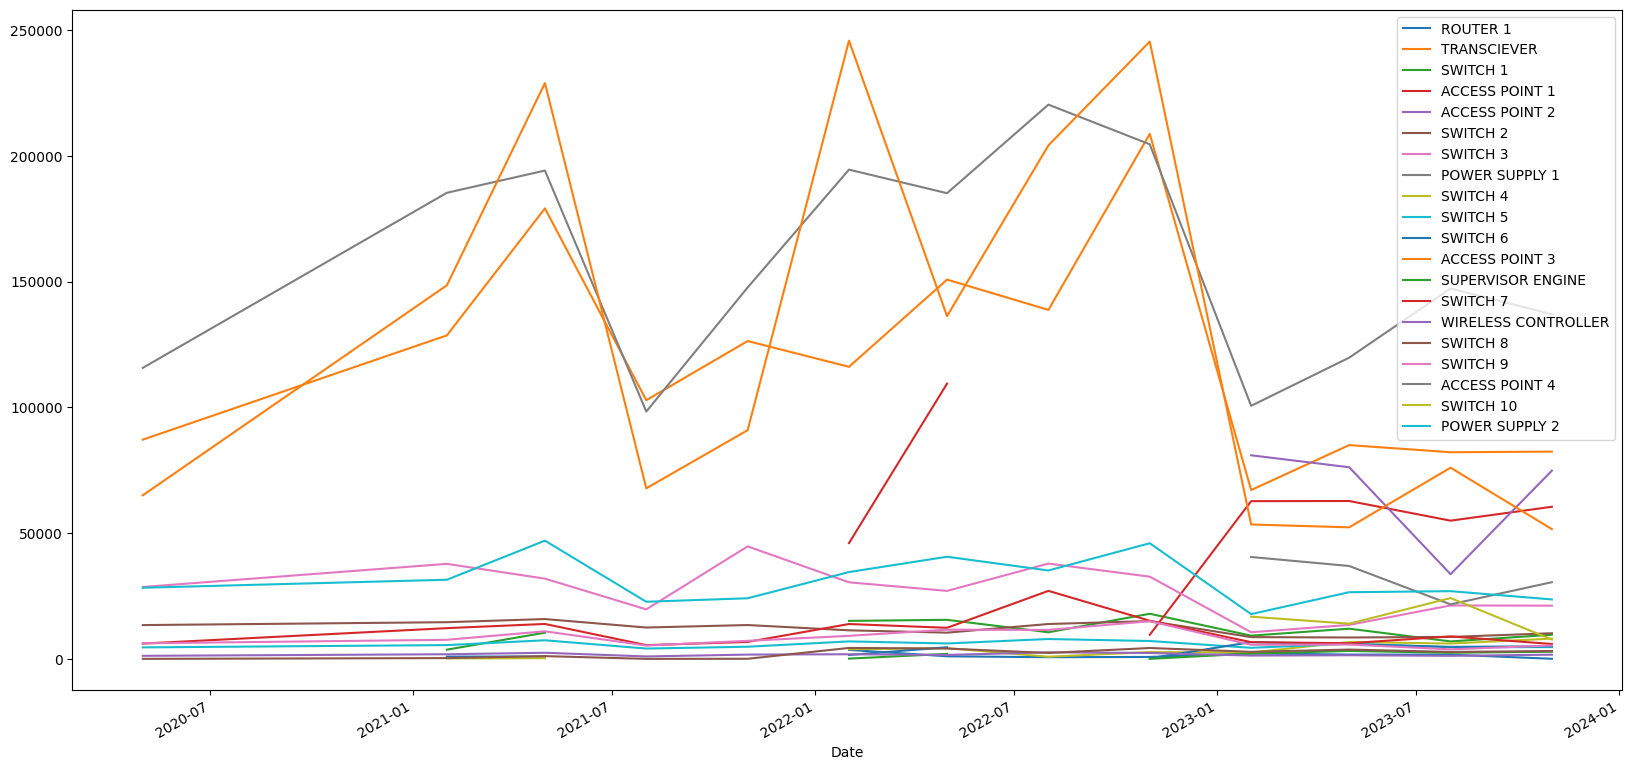

In [301]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = transposed.columns[1:]
for col in columns:
    transposed.plot(x = 'Date', y = col, ax = ax)

iterative imputed

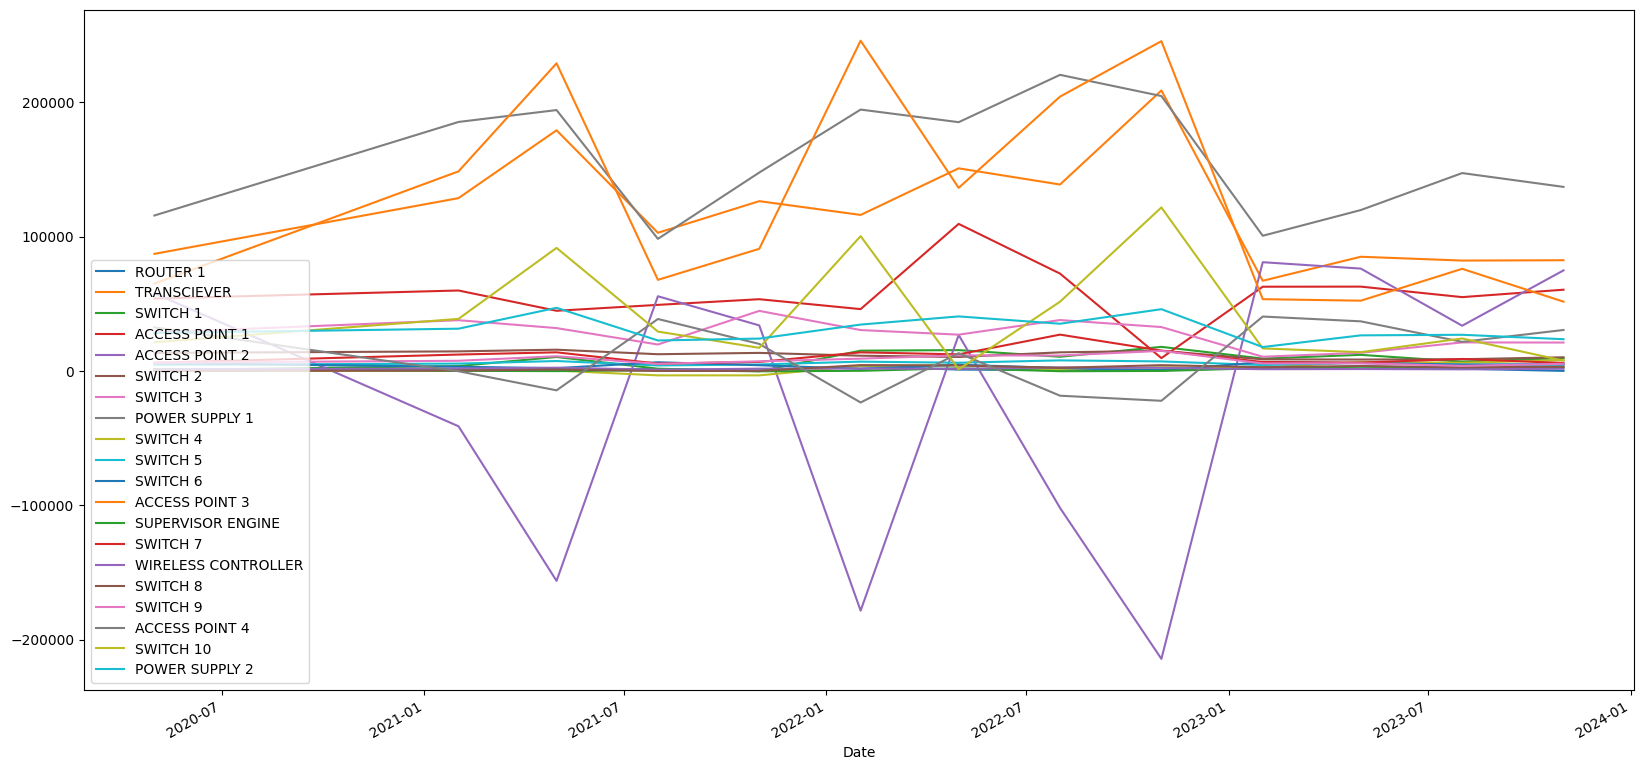

In [302]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new.columns[1:]
for col in columns:
    new.plot(x = 'Date', y = col, ax = ax)

zero imputed

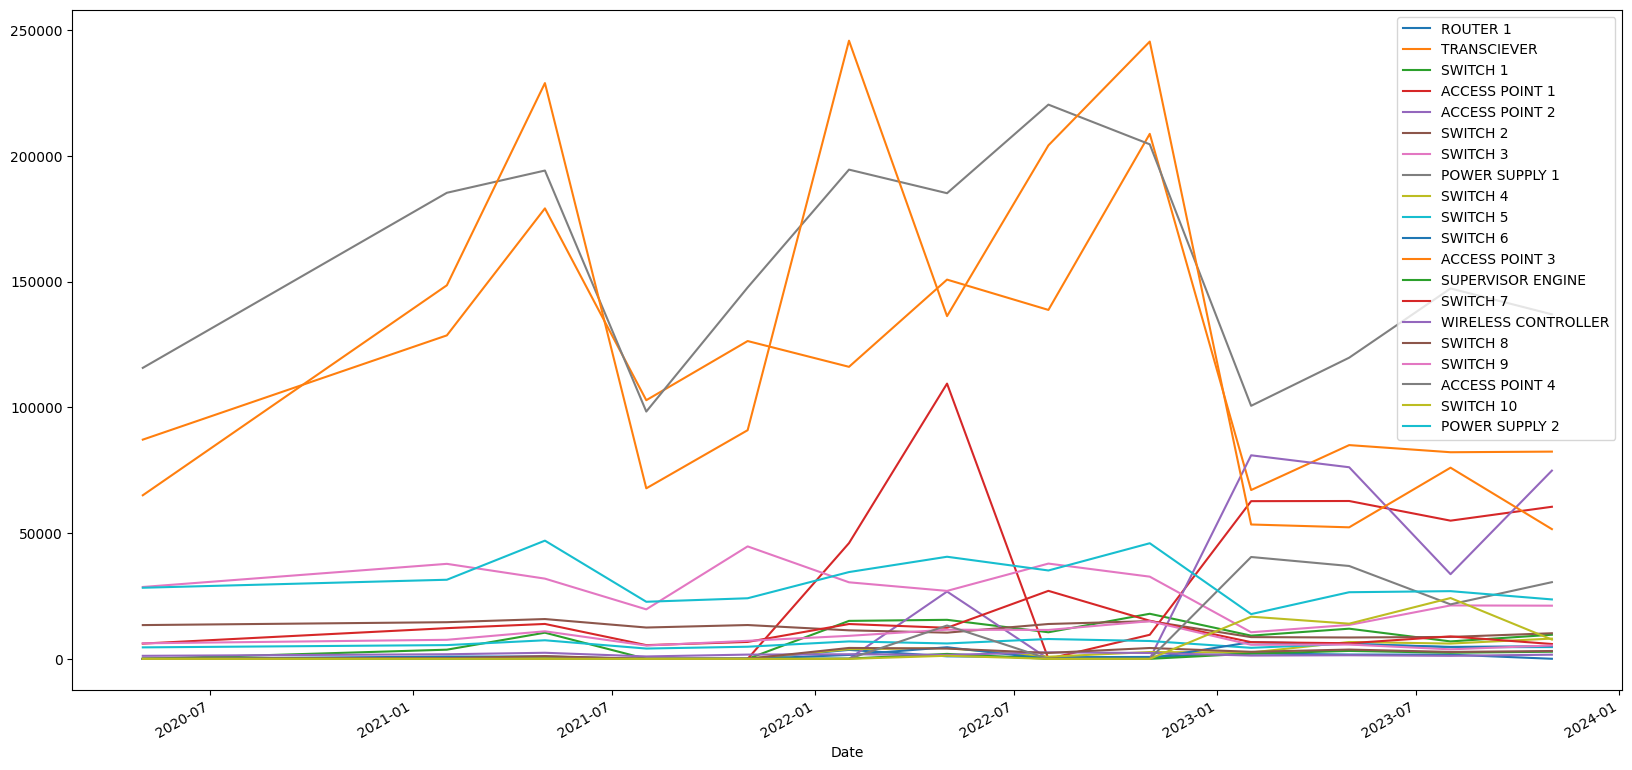

In [303]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_0.columns[1:]
for col in columns:
    new_0.plot(x = 'Date', y = col, ax = ax)

spline imputed

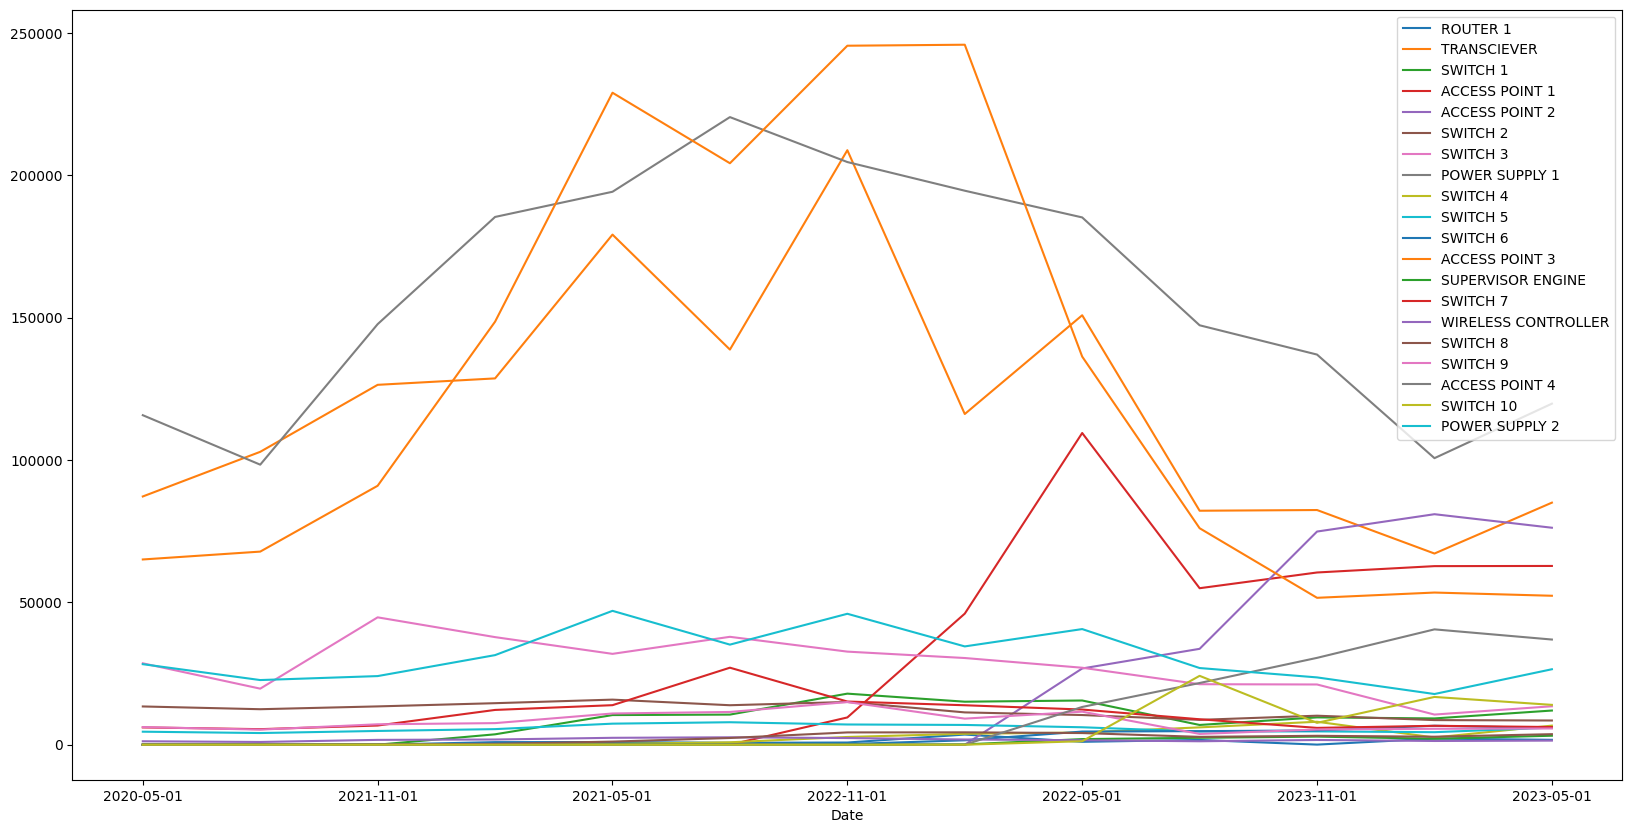

In [304]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_spline.columns[1:]
for col in columns:
    new_spline.plot(x = 'Date', y = col, ax = ax)

linear imputed

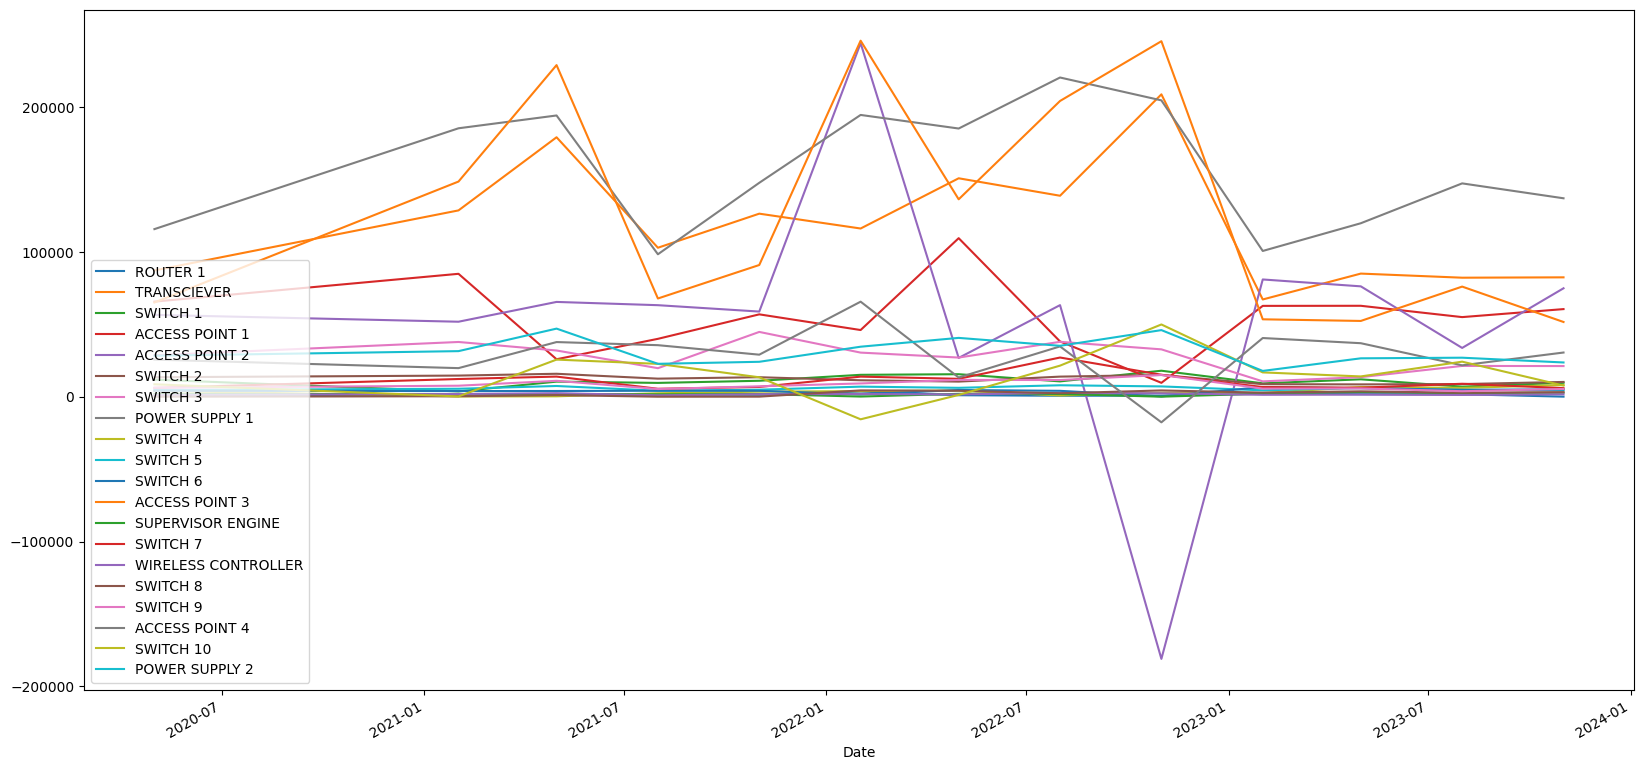

In [305]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_linear.columns[1:]
for col in columns:
    new_linear.plot(x = 'Date', y = col, ax = ax)

normalisation

In [306]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'transposed' is your DataFrame containing the data
scaler = MinMaxScaler(feature_range=(-1, 1))

scaled_iterative = scaler.fit_transform(new.iloc[:, 1:])
scaled_iterative_df = pd.DataFrame(scaled_iterative, columns=new.columns[1:])
scaled_iterative_df.insert(0,'Date',new['Date'])

scaled_zero = scaler.fit_transform(new_0.iloc[:, 1:])
scaled_0_df = pd.DataFrame(scaled_zero, columns=new_0.columns[1:])
scaled_0_df.insert(0,'Date',new_0['Date'])

scaled_spline = scaler.fit_transform(new_spline.iloc[:, 1:])
scaled_spline_df = pd.DataFrame(scaled_spline, columns=new_spline.columns[1:])
scaled_spline_df.insert(0,'Date',new_spline['Date'])

scaled_linear = scaler.fit_transform(new_linear.iloc[:, 1:])
scaled_linear_df = pd.DataFrame(scaled_linear, columns=new_linear.columns[1:])
scaled_linear_df.insert(0,'Date',new_linear['Date'])

In [307]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20 , 10 ))
# ax = plt.gca()
# columns = scaled_iterative_df.columns[1:]
# for col in columns:
#     scaled_iterative_df.plot(x = 'Date', y = col, ax = ax)

feature engineering

lag features

In [308]:
# Define the number of lag quarters
lag_periods = 5

# Create lag features for each product
columns = new.columns[1:]

# iterative imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)

scaled_iterative_df.fillna(0, inplace=True)

scaled_iterative_df = scaled_iterative_df.copy()

# zero imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_0_df[f'{product}_Lag{i}'] = scaled_0_df[product].shift(i)

scaled_0_df.fillna(0, inplace=True)

scaled_0_df = scaled_0_df.copy()

# spline imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_spline_df[f'{product}_Lag{i}'] = scaled_spline_df[product].shift(i)

scaled_spline_df.fillna(0, inplace=True)

scaled_spline_df = scaled_spline_df.copy()


# linear imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_linear_df[f'{product}_Lag{i}'] = scaled_linear_df[product].shift(i)

scaled_linear_df.fillna(0, inplace=True)

scaled_linear_df = scaled_linear_df.copy()

# scaled_iterative_df

<ipython-input-308-f1f158c591b4>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)
<ipython-input-308-f1f158c591b4>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)
<ipython-input-308-f1f158c591b4>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

visualising correlations

<Figure size 1200x600 with 0 Axes>

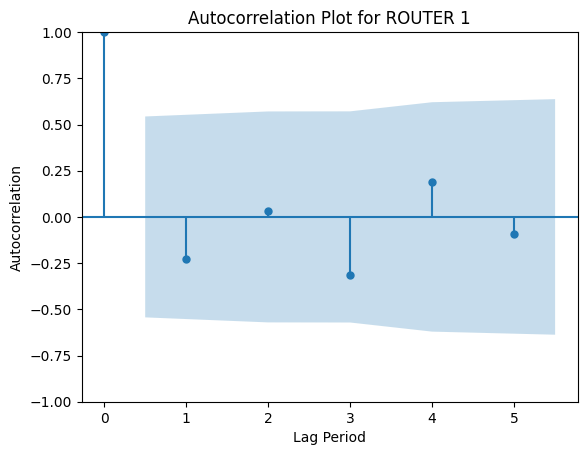

<Figure size 1200x600 with 0 Axes>

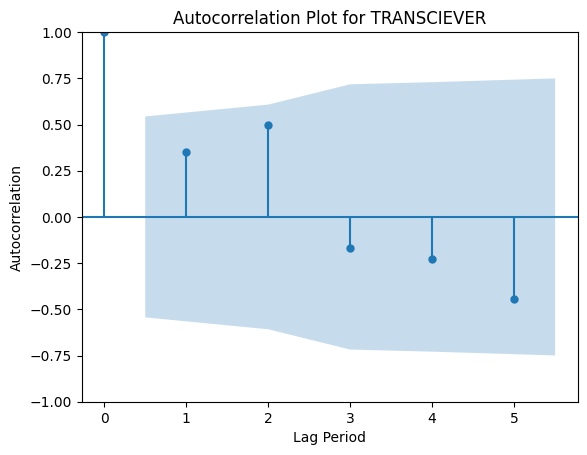

<Figure size 1200x600 with 0 Axes>

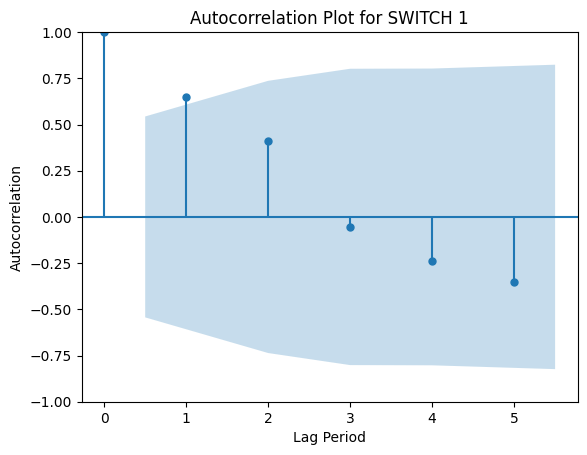

<Figure size 1200x600 with 0 Axes>

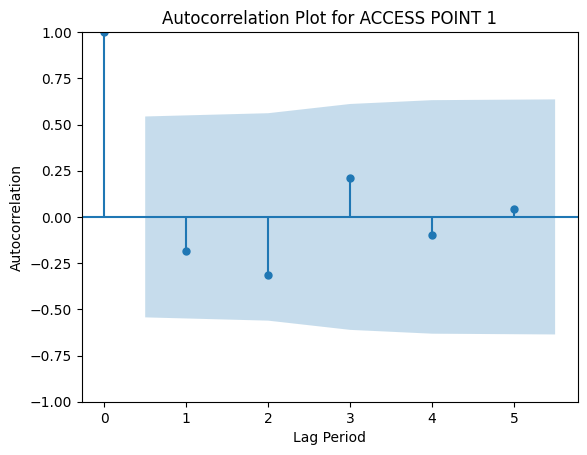

<Figure size 1200x600 with 0 Axes>

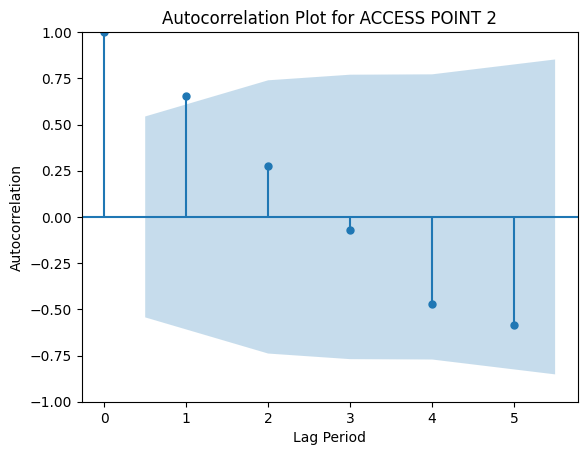

<Figure size 1200x600 with 0 Axes>

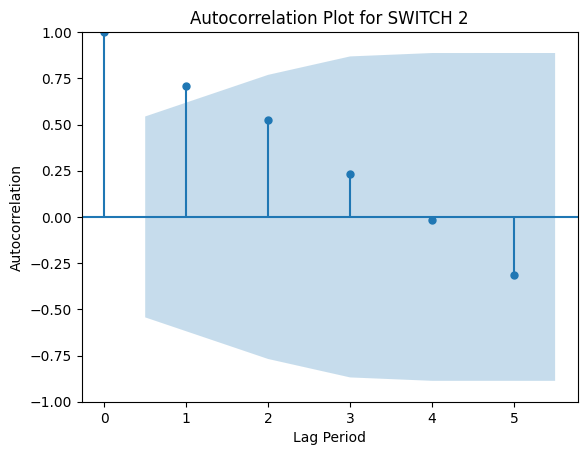

<Figure size 1200x600 with 0 Axes>

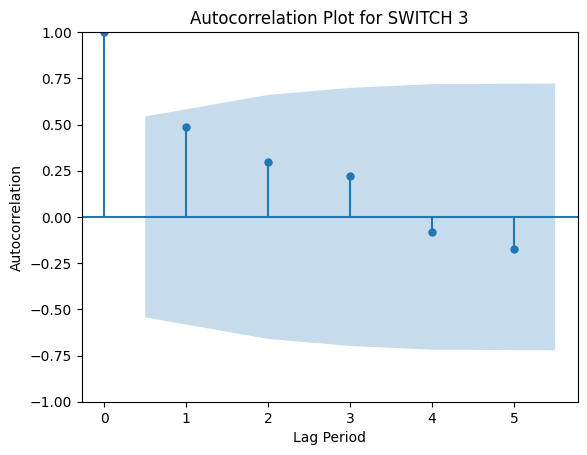

<Figure size 1200x600 with 0 Axes>

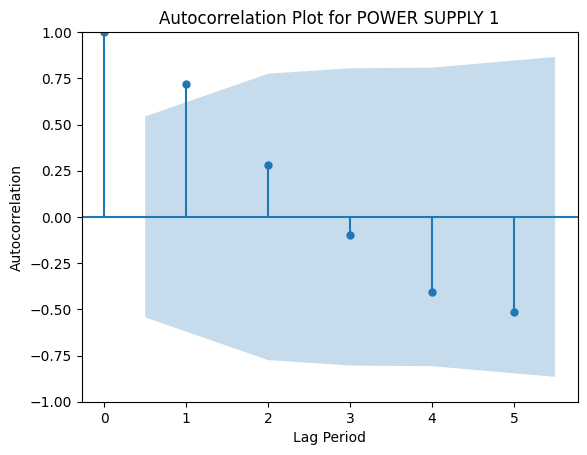

<Figure size 1200x600 with 0 Axes>

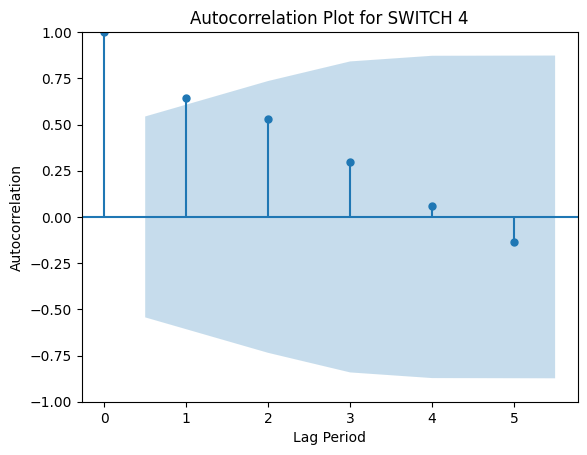

<Figure size 1200x600 with 0 Axes>

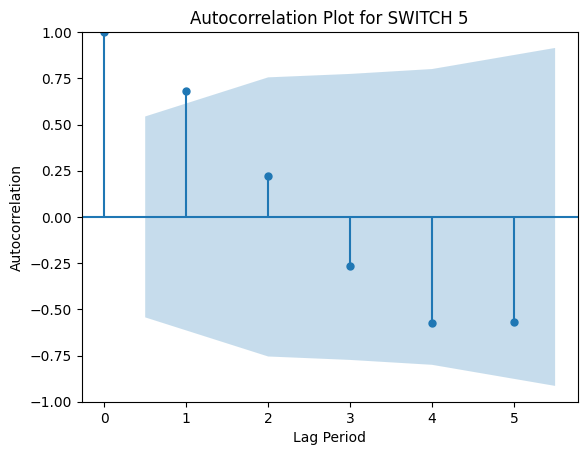

<Figure size 1200x600 with 0 Axes>

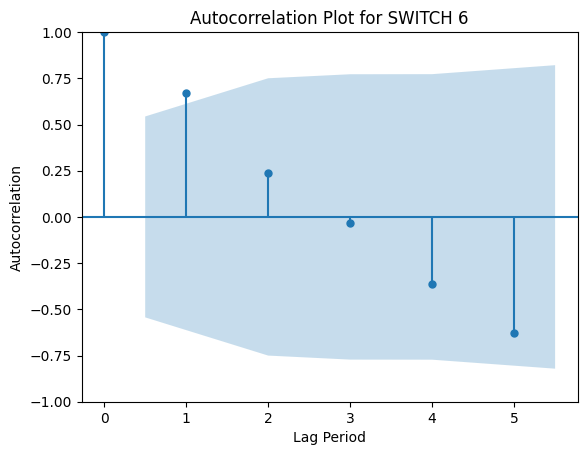

<Figure size 1200x600 with 0 Axes>

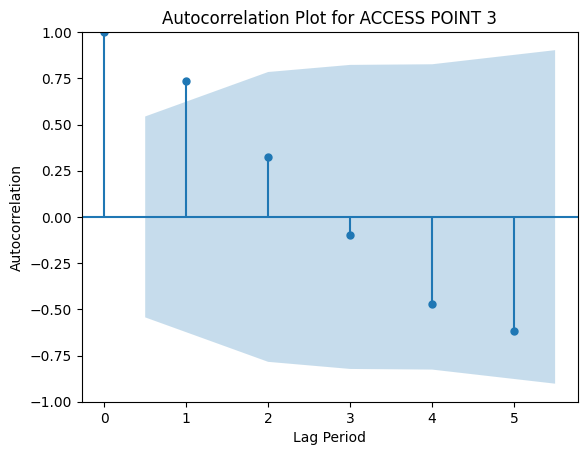

<Figure size 1200x600 with 0 Axes>

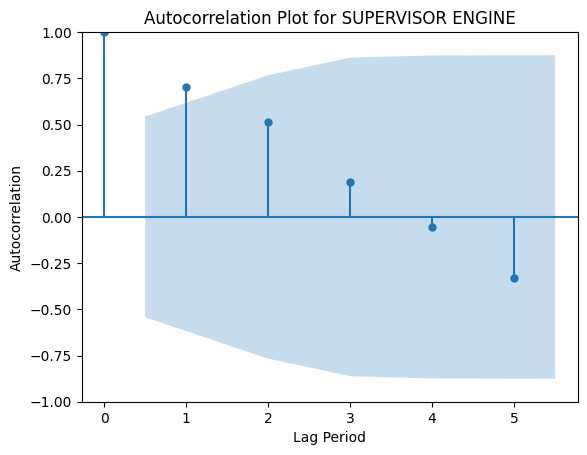

<Figure size 1200x600 with 0 Axes>

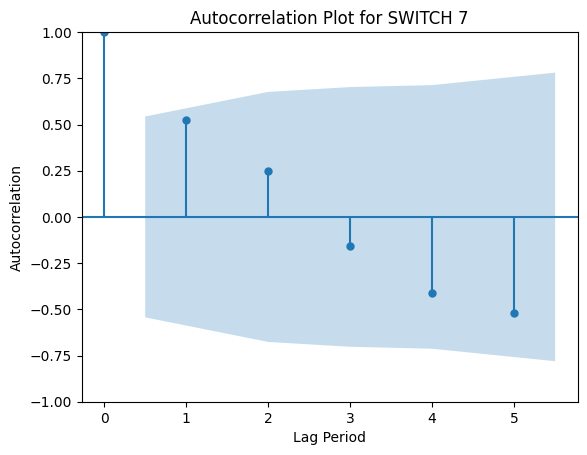

<Figure size 1200x600 with 0 Axes>

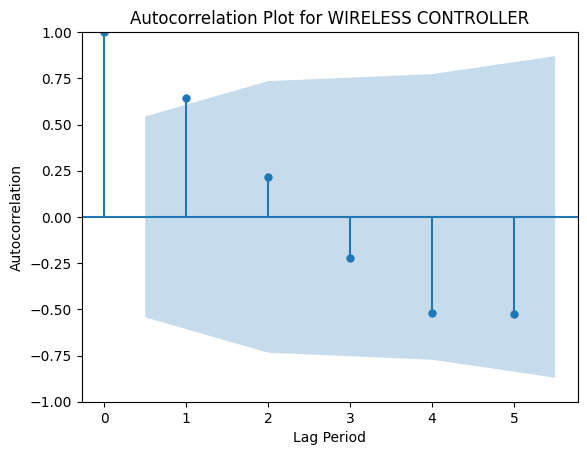

<Figure size 1200x600 with 0 Axes>

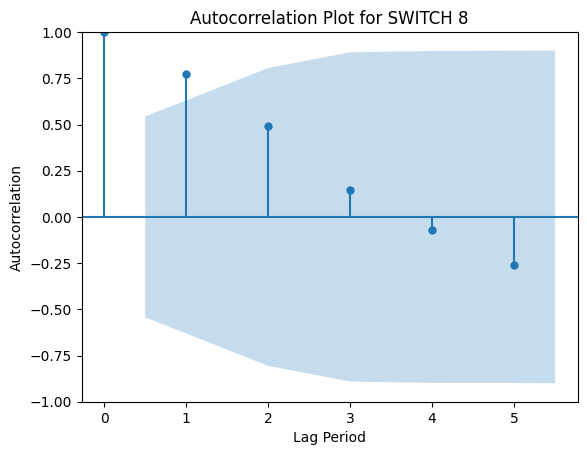

<Figure size 1200x600 with 0 Axes>

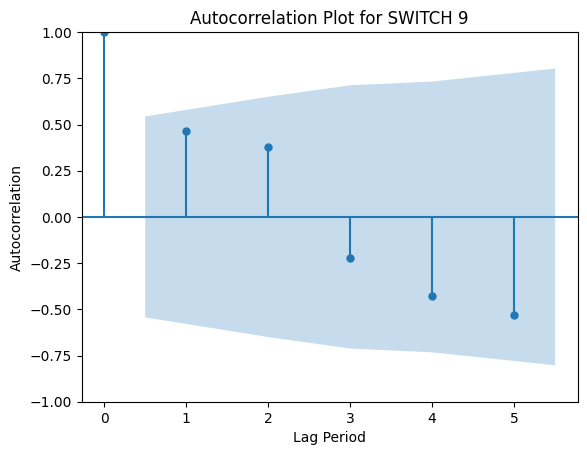

<Figure size 1200x600 with 0 Axes>

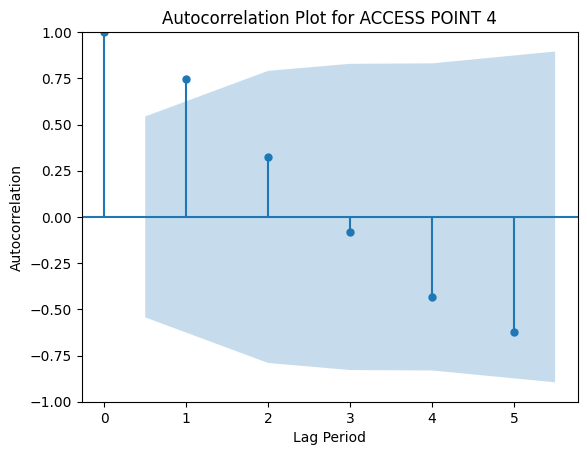

<Figure size 1200x600 with 0 Axes>

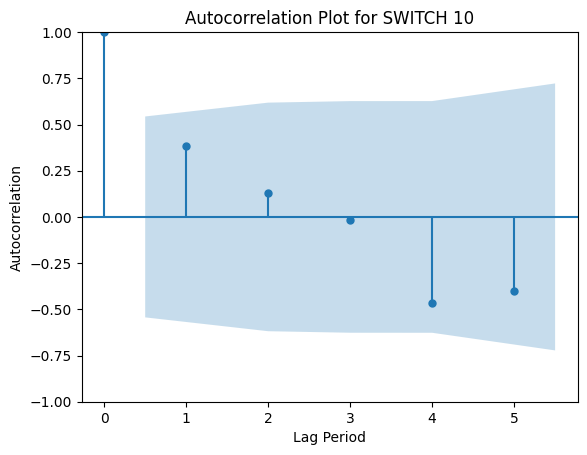

<Figure size 1200x600 with 0 Axes>

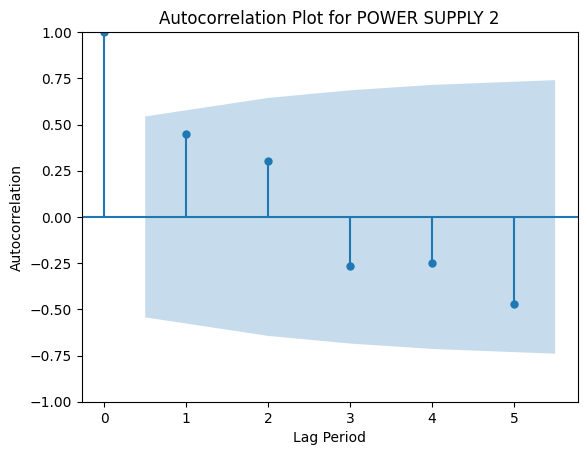

In [309]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# List of products
products = new.columns[1:]

# Iterate over each product
for product in products:
    # Plot ACF for the current product
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    plot_acf(scaled_iterative_df[product], lags=lag_periods)
    plt.title(f'Autocorrelation Plot for {product}')
    plt.xlabel('Lag Period')
    plt.ylabel('Autocorrelation')
    plt.show()


In [310]:
scaled_iterative_df

Product Name,Date,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 10_Lag1,SWITCH 10_Lag2,SWITCH 10_Lag3,SWITCH 10_Lag4,SWITCH 10_Lag5,POWER SUPPLY 2_Lag1,POWER SUPPLY 2_Lag2,POWER SUPPLY 2_Lag3,POWER SUPPLY 2_Lag4,POWER SUPPLY 2_Lag5
0,2020-05-01,-0.251036,-0.716991,-0.914510,-0.112615,0.843131,0.345608,0.054540,-0.715327,-0.429873,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-08-01,-0.207198,-0.495622,-0.793520,-0.206721,0.828385,0.081288,-0.466784,-1.000000,-1.000000,...,-0.665586,0.000000,0.000000,0.000000,0.000000,-0.282438,0.000000,0.000000,0.000000,0.000000
2,2021-11-01,-0.803005,-0.163400,-1.000000,-0.122374,0.681282,0.351064,1.000000,-0.191407,-0.999925,...,-0.533616,-0.665586,0.000000,0.000000,0.000000,-0.664156,-0.282438,0.000000,0.000000,0.000000
3,2021-02-01,-0.507797,-0.131570,-0.575462,0.007524,0.172816,0.659029,0.593263,0.425493,-0.391082,...,-0.734606,-0.533616,-0.665586,0.000000,0.000000,-0.568709,-0.664156,-0.282438,0.000000,0.000000
4,2021-05-01,-0.487950,0.581509,0.169968,-0.294673,-0.606801,1.000000,0.249033,0.570402,-0.374677,...,-0.376854,-0.734606,-0.533616,-0.665586,0.000000,-0.064567,-0.568709,-0.664156,-0.282438,0.000000
5,2022-08-01,-0.645591,0.011354,0.188278,0.259452,-0.238923,0.463448,0.599531,1.000000,-0.272365,...,0.500097,-0.376854,-0.734606,-0.533616,-0.665586,1.000000,-0.064567,-0.568709,-0.664156,-0.282438
6,2022-11-01,-0.585483,1.000000,1.000000,-1.000000,-1.000000,0.776596,0.294962,0.741383,0.056971,...,-0.164623,0.500097,-0.376854,-0.734606,-0.533616,0.187675,1.000000,-0.064567,-0.568709,-0.664156
7,2022-02-01,1.000000,-0.308131,0.687842,-0.270035,-0.756855,-0.222586,0.163327,0.576432,0.253833,...,1.000000,-0.164623,0.500097,-0.376854,-0.734606,0.929408,0.187675,1.000000,-0.064567,-0.568709
8,2022-05-01,-0.443153,0.181560,0.734279,1.000000,0.632989,-0.475450,-0.036673,0.422756,0.332507,...,0.645771,1.000000,-0.164623,0.500097,-0.376854,0.144745,0.929408,0.187675,1.000000,-0.064567
9,2023-08-01,-0.074568,-0.787740,-0.212895,-0.091293,0.679740,-0.938080,-0.375395,-0.197912,0.651789,...,-1.000000,0.645771,1.000000,-0.164623,0.500097,0.561520,0.144745,0.929408,0.187675,1.000000


Periodic Differences

In [314]:
# Define the number of lag quarters
lag_periods = 5

# Iterate over each lagged feature for each product
for product in columns:
    for i in range(1, lag_periods + 1):
        # Compute the periodic difference for the current lagged feature
        scaled_iterative_df[f'{product}_Lag{i}_Diff'] = scaled_iterative_df[f'{product}_Lag{i}'].diff()
        scaled_spline_df[f'{product}_Lag{i}_Diff'] = scaled_spline_df[f'{product}_Lag{i}'].diff()
        scaled_linear_df[f'{product}_Lag{i}_Diff'] = scaled_linear_df[f'{product}_Lag{i}'].diff()
        scaled_0_df[f'{product}_Lag{i}_Diff'] = scaled_0_df[f'{product}_Lag{i}'].diff()
# Fill NaN values with 0 after computing differences
scaled_iterative_df.fillna(0, inplace=True)
scaled_spline_df.fillna(0,inplace=True)
scaled_linear_df.fillna(0,inplace=True)
scaled_0_df.fillna(0,inplace=True)
scaled_iterative_df.head(10)

<ipython-input-314-47d2c4c87298>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}_Diff'] = scaled_iterative_df[f'{product}_Lag{i}'].diff()
<ipython-input-314-47d2c4c87298>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_spline_df[f'{product}_Lag{i}_Diff'] = scaled_spline_df[f'{product}_Lag{i}'].diff()
<ipython-input-314-47d2c4c87298>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

Product Name,Date,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 10_Lag1_Diff,SWITCH 10_Lag2_Diff,SWITCH 10_Lag3_Diff,SWITCH 10_Lag4_Diff,SWITCH 10_Lag5_Diff,POWER SUPPLY 2_Lag1_Diff,POWER SUPPLY 2_Lag2_Diff,POWER SUPPLY 2_Lag3_Diff,POWER SUPPLY 2_Lag4_Diff,POWER SUPPLY 2_Lag5_Diff
0,2020-05-01,-0.251036,-0.716991,-0.914510,-0.112615,0.843131,0.345608,0.054540,-0.715327,-0.429873,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-08-01,-0.207198,-0.495622,-0.793520,-0.206721,0.828385,0.081288,-0.466784,-1.000000,-1.000000,...,-0.665586,0.000000,0.000000,0.000000,0.000000,-0.282438,0.000000,0.000000,0.000000,0.000000
2,2021-11-01,-0.803005,-0.163400,-1.000000,-0.122374,0.681282,0.351064,1.000000,-0.191407,-0.999925,...,0.131971,-0.665586,0.000000,0.000000,0.000000,-0.381719,-0.282438,0.000000,0.000000,0.000000
3,2021-02-01,-0.507797,-0.131570,-0.575462,0.007524,0.172816,0.659029,0.593263,0.425493,-0.391082,...,-0.200990,0.131971,-0.665586,0.000000,0.000000,0.095447,-0.381719,-0.282438,0.000000,0.000000
4,2021-05-01,-0.487950,0.581509,0.169968,-0.294673,-0.606801,1.000000,0.249033,0.570402,-0.374677,...,0.357752,-0.200990,0.131971,-0.665586,0.000000,0.504142,0.095447,-0.381719,-0.282438,0.000000
5,2022-08-01,-0.645591,0.011354,0.188278,0.259452,-0.238923,0.463448,0.599531,1.000000,-0.272365,...,0.876951,0.357752,-0.200990,0.131971,-0.665586,1.064567,0.504142,0.095447,-0.381719,-0.282438
6,2022-11-01,-0.585483,1.000000,1.000000,-1.000000,-1.000000,0.776596,0.294962,0.741383,0.056971,...,-0.664720,0.876951,0.357752,-0.200990,0.131971,-0.812325,1.064567,0.504142,0.095447,-0.381719
7,2022-02-01,1.000000,-0.308131,0.687842,-0.270035,-0.756855,-0.222586,0.163327,0.576432,0.253833,...,1.164623,-0.664720,0.876951,0.357752,-0.200990,0.741732,-0.812325,1.064567,0.504142,0.095447
8,2022-05-01,-0.443153,0.181560,0.734279,1.000000,0.632989,-0.475450,-0.036673,0.422756,0.332507,...,-0.354229,1.164623,-0.664720,0.876951,0.357752,-0.784663,0.741732,-0.812325,1.064567,0.504142
9,2023-08-01,-0.074568,-0.787740,-0.212895,-0.091293,0.679740,-0.938080,-0.375395,-0.197912,0.651789,...,-1.645771,-0.354229,1.164623,-0.664720,0.876951,0.416775,-0.784663,0.741732,-0.812325,1.064567


In [320]:
#target = scaled_iterative_df.iloc[-1:,:]

In [321]:
#target

Product Name,Date,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,...,SWITCH 10_Lag1_Diff,SWITCH 10_Lag2_Diff,SWITCH 10_Lag3_Diff,SWITCH 10_Lag4_Diff,SWITCH 10_Lag5_Diff,POWER SUPPLY 2_Lag1_Diff,POWER SUPPLY 2_Lag2_Diff,POWER SUPPLY 2_Lag3_Diff,POWER SUPPLY 2_Lag4_Diff,POWER SUPPLY 2_Lag5_Diff
12,2023-05-01,-0.048483,-0.747677,0.34546,0.065221,0.967807,-1.0,-0.829174,-0.648961,0.759568,...,0.150939,-0.274021,0.381149,-1.645771,-0.354229,-0.399589,-0.225265,-0.936666,0.416775,-0.784663


In [322]:
target_iterative_df = scaled_iterative_df.iloc[-1:,:]
target_0_df = scaled_0_df.iloc[-1:,:]
target_linear_df = scaled_iterative_df.iloc[-1:,:]
target_spline_df = scaled_spline_df.iloc[-1:,:]

Feature Selection

In [323]:
from sklearn.ensemble import RandomForestRegressor
import random
import numpy as np

In [ ]:
'''np.random.seed(10)

# define the model
model = RandomForestRegressor(random_state = random.seed(10))
# fit the model
model.fit(scaled_iterative_df, target)

# get importance
features = predictors
importances = model.feature_importances_
indices = np.argsort(importances)

feat_importances = pd.Series(model.feature_importances_, index=predictors.columns)
feat_importances.nlargest(30).plot(kind='barh')'''

PROPHET

In [ ]:
# ! pip install fbprophet

In [ ]:
# # on iterative imputed dataset
# new['Date'] = pd.to_datetime(new['Date'])
# new

In [ ]:
# !python -m pip install prophet

In [ ]:
# from prophet import Prophet
# # Loop over each product column (excluding 'Date')
# for product_column in new.columns[1:]:
#     # Select 'Date' and the current product column
#     product_df = new[['Date', product_column]].rename(columns={'Date': 'ds', product_column: 'y'})

#     # Drop any rows with missing values
#     product_df.dropna(inplace=True)

#     # Ensure no negative values in the 'y' column
#     product_df = product_df[product_df['y'] >= 0]

#     # Initialize and fit the Prophet model
#     model = Prophet()
#     model.fit(product_df)

#     # Create future dates for forecasting
#     future_dates = model.make_future_dataframe(periods=4, freq='Q') # making predictions at a frequency of one quarter

#     # Make forecasts
#     forecast = model.predict(future_dates)

#     # Store the forecast results in a separate DataFrame or data structure
#     # You can print, save, or perform further analysis on the forecast data
#     print(f'Forecast for {product_column}:')
#     print('\n')
#     forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # Print the last 5 forecasted values
#     print('\n')